# THE SPARKS FOUNDATION

### GRIP : DATA SCIENCE & BUSINESS ANALYTICS INTERN - JULY 2021

### Name : Sara Tuscano

### TASK-2 : Prediction Using Unsupervised ML

### Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

**Importing required libraries**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
from sklearn import datasets
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

**Loading data**

In [2]:
data=pd.read_csv("C:\\Users\\Sara\\Downloads\\Iris.csv")

**Understanding data**

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Structure of data
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Descriptive Statistics**

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking Missing Values**

In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- **There are no missing values.**

In [9]:
# Dropping ID as it's not required
data=data.drop("Id",axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# To see different species
data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**Checking for Outliers**

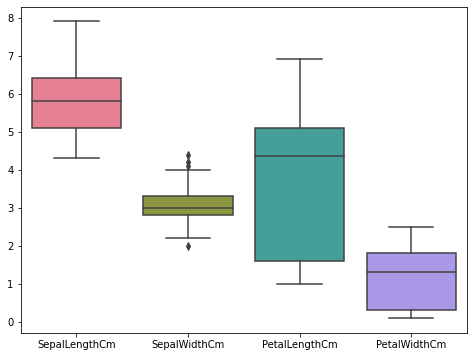

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,palette='husl')
plt.show()

### Data Visualisation

### Pairplot 
- A pairplot plost a pairwise relationships in a dataset. <br>
- Used to check the binary relation among the differnt features in one graph. <br>
- The plots on the diagonal shows the distribution of the feature. <br>
- The rest of the plots shows the relationship between two features.<br>

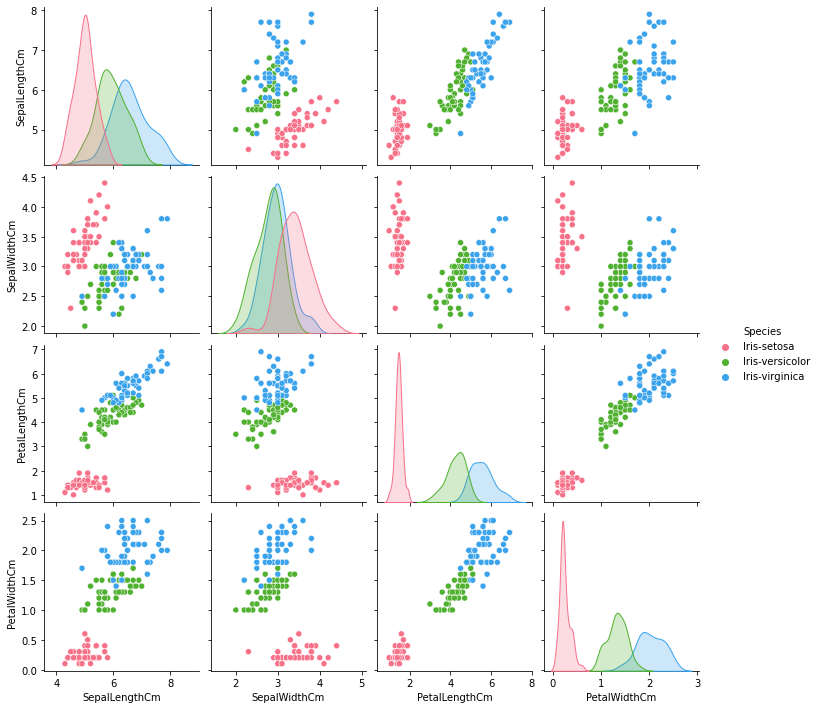

In [12]:
sns.pairplot(data,hue='Species',diag_kind='kde',palette='husl')

- Setosa is isolated from the other two species whereas Versicolor and Virginica mostly have similar dimension.s<br>
- High correlation between Petal length & Petal Width.<br>
- Setosa has low petal length & petal width.<br>
- Setosa has low sepal length & high sepal width.<br>
- Virginica has both high petal length and width.<br>
- Versicolor has average dimensions for all features.

### Correlation

<AxesSubplot:>

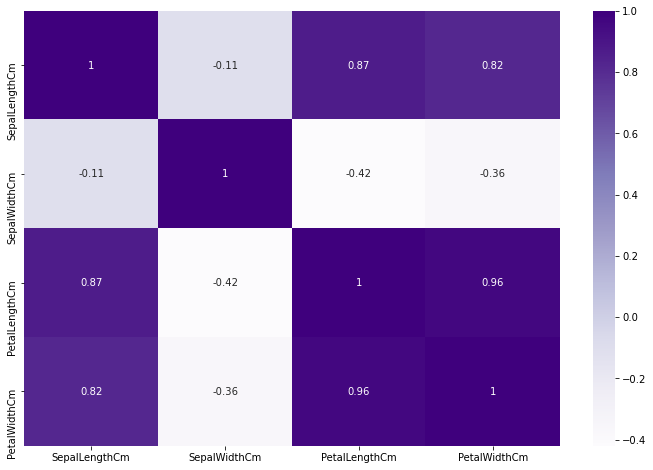

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='Purples')

In [14]:
# Removing Species column to predict clusters
X=data.iloc[:,0:4].values

### Finding optimum number of clusters for K-means algorithm using Elbow Method

### Elbow Method <br>
- The Elbow Method is used to determine the optimum number of clusters(k) in k-means clustering. <br>
- For each value of k, WCSS(Within-Cluster Sum of Squares) value is calculated. WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease.<br>
- The main idea is to minimize the distance between the data points and the centroid of the clusters.<br>
- The optimum number of clusters is where the elbow occurs

In [15]:
from sklearn.cluster import KMeans

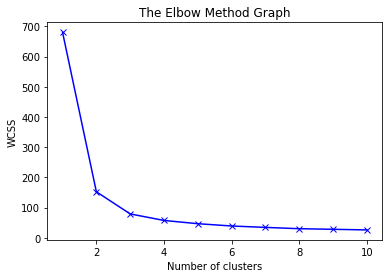

In [18]:
WCSS_values = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    WCSS_values.append(kmeans.inertia_)
    
plt.plot(range(1,11),WCSS_values,'bx-')
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

- **The elbow is formed at 3, so the optimum number of clusters = 3**

### Applying kmeans classifier to the dataset

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_pred = kmeans.fit_predict(X)   # fitting model to dataset

### Visualising the clusters for Sepal length & Sepal width

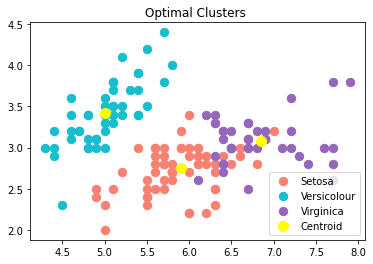

In [25]:
plt.scatter(X[y_pred == 0 ,0] , X[y_pred == 0 ,1] , s=70 , c = 'salmon' , label = 'Setosa')
plt.scatter(X[y_pred == 1 ,0] , X[y_pred == 1 ,1] , s=70 , c = '#17becf' , label = 'Versicolour')
plt.scatter(X[y_pred == 2 ,0] , X[y_pred == 2 ,1] , s=70 , c = '#9467bd' , label = 'Virginica')

# To plot centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 , c = 'yellow' , label = 'Centroid')
plt.title("Optimal Clusters ")
plt.legend()
plt.show()